In [7]:
from collections import Counter
import re
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud

## 文件解析及load

In [10]:
def words(text):
    return re.findall(r'\w+', text.lower())
word_list = words(open('./data/big.txt').read())

In [11]:
WORDS = Counter(word_list)

In [12]:
WORDS

Counter({'the': 79809,
         'project': 288,
         'gutenberg': 263,
         'ebook': 87,
         'of': 40024,
         'adventures': 17,
         'sherlock': 101,
         'holmes': 467,
         'by': 6735,
         'sir': 177,
         'arthur': 34,
         'conan': 4,
         'doyle': 5,
         '15': 47,
         'in': 22023,
         'our': 1065,
         'series': 128,
         'copyright': 51,
         'laws': 233,
         'are': 3630,
         'changing': 43,
         'all': 4143,
         'over': 1282,
         'world': 362,
         'be': 6155,
         'sure': 123,
         'to': 28765,
         'check': 38,
         'for': 6941,
         'your': 1279,
         'country': 423,
         'before': 1362,
         'downloading': 5,
         'or': 5352,
         'redistributing': 7,
         'this': 4063,
         'any': 1203,
         'other': 1501,
         'header': 7,
         'should': 1297,
         'first': 1174,
         'thing': 303,
         'seen': 444,
  

## 词频分析

- top10
- plot word freq
- 转换为概率

In [13]:
len(WORDS)

32198

In [14]:
sum(WORDS.values())

1115585

In [15]:
WORDS.most_common(10)

[('the', 79809),
 ('of', 40024),
 ('and', 38312),
 ('to', 28765),
 ('in', 22023),
 ('a', 21124),
 ('that', 12512),
 ('he', 12401),
 ('was', 11410),
 ('it', 10681)]

In [18]:
WORDS.most_common()[-10:]

[('moslem', 1),
 ('glen', 1),
 ('buggy', 1),
 ('folio', 1),
 ('syrian', 1),
 ('wench', 1),
 ('wiki', 1),
 ('frequency_lists', 1),
 ('xrange', 1),
 ('min', 1)]

In [20]:
values = list(WORDS.values())
values.sort(reverse=True)

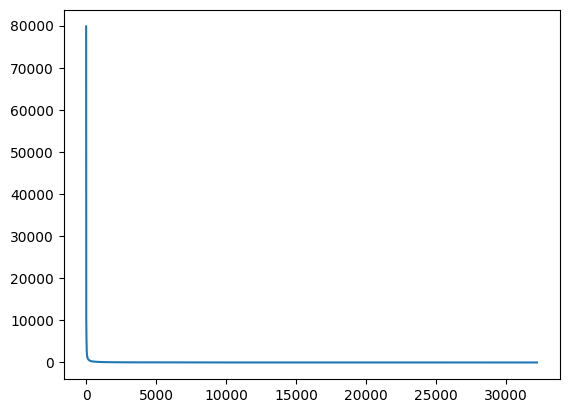

In [27]:
# plt.xscale('log')
# plt.yscale('log')
plt.plot(values)

In [23]:
def P(word, N=sum(WORDS.values())):
    return WORDS[word]/N

In [24]:
P('the')

0.07154004401278254

In [25]:
WORDS['the']/1115585

0.07154004401278254

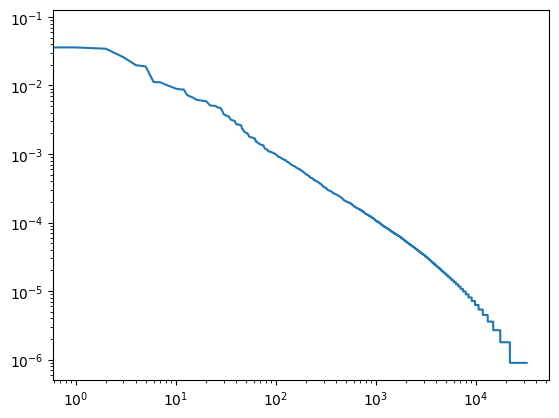

In [28]:
plt.xscale('log')
plt.yscale('log')
plt.plot([v/1115585 for v in values])

## 词云

In [33]:
wc = WordCloud(max_font_size=20, max_words=200, background_color="white").generate_from_frequencies(WORDS)
# wc = WordCloud().generate(open('./data/big.txt').read())

(-0.5, 399.5, 199.5, -0.5)

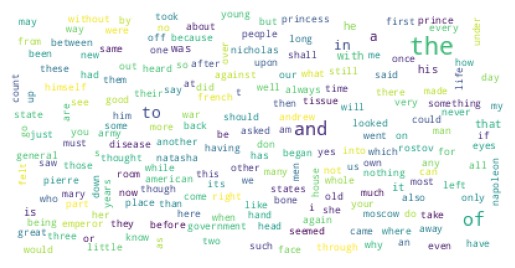

In [34]:
plt.imshow(wc,)
plt.axis('off')

## zipf law 

- Zipf's law simply states that given a corpus (large and structured set of texts) of natural language utterances, the most frequent word will occur approximately twice as often as the second most frequent word, three times as often as the third most frequent word, four times as often as the fourth most frequent word, and so forth.

- Most frequent： $M$，则基于 zipf law
    - 排第一的 $M/1$
    - 排第二的 $M/2$
    - 排第 n 的 $M/n$

$$
y=\frac{M}x, x=1,..., N
$$

In [35]:
M = WORDS['the']

$$
\begin{split}
&y=\frac{M}x\\
&\log y=\log \frac{M}x \\
&\log y=\log M-\log x\\
&y'=\log M-x'
\end{split}
$$

In [36]:
for i, (w, c) in enumerate(WORDS.most_common(10)):
    print(i, w, c, M/(i+1))

0 the 79809 79809.0
1 of 40024 39904.5
2 and 38312 26603.0
3 to 28765 19952.25
4 in 22023 15961.8
5 a 21124 13301.5
6 that 12512 11401.285714285714
7 he 12401 9976.125
8 was 11410 8867.666666666666
9 it 10681 7980.9


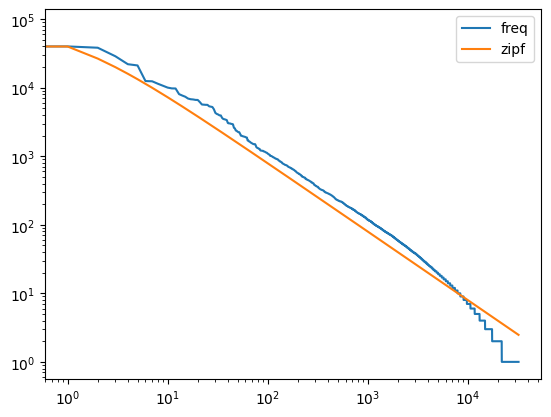

In [38]:
plt.xscale('log')
plt.yscale('log')
plt.plot([c for w, c in WORDS.most_common()], label='freq')
plt.plot([M/i for i in range(1, len(WORDS)+1)], label='zipf')
plt.legend()